In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# For optimization using pygmo
import pygmo as pg
from udp_initial_condition import udp_initial_condition

# For Plotting
import matplotlib.pyplot as plt

from math import pi


In [45]:
import numpy as np
#import pykep as pk
# Setup hyperparameters:
body_density = 533           # https://sci.esa.int/web/rosetta/-/14615-comet-67p
target_altitude = 5000**2    # Target altitude squared
final_time = 20*3600.0       # Final time
start_time = 0               # Starting time
time_step = 600.0            # Time step size for trajectory propagation.
mu = 665.666                 # Gravitational parameter for 67P/C-G

# Bounds of the search space for the parameter optimization
#  Osculating orbital elements
a = [10000, 15000] # Semi-major axis
e = [0, 2]     # Eccentricity [0,1] (or (1,2) maybe?)
o = [0, 2*pi]  # Right ascension of ascending node [0,2*pi]
w = [0, 2*pi]  # Argument of periapsis [0, 2*pi]
i = [0, pi]    # Inclination [0, pi] 
#v = [0, 2*pi]  # True anomaly [0, 2*pi]
ea = [0, 2*pi] # Eccentric anomaly [0, 2*pi] for e<0, or the Gudermannian for e>1 

#x = np.array([10868.433406369919, 1.4916806845868078, 0.49798958467148535, 5.113590246345496, 6.267202458773954, 0.025083557832227342])
#lower_bounds = [x[0]-1e-1, x[1]-1e-1, x[2]-1e-1, x[3]-1e-1, x[4]-1e-1, x[5]-1e-1]
#upper_bounds = [x[0]+1e-1, x[1]+1e-1, x[2]+1e-1, x[3]+1e-1, x[4]+1e-1, x[5]+1e-1]

lower_bounds = [a[0], e[0], i[0], o[0], w[0], ea[0]]
upper_bounds = [a[1], e[1], i[1], o[1], w[1], ea[1]]

#r, v = pk.par2ic(lower_bounds,mu)
#print("lb:  r: ", r, ",  v: ", v)
#r, v = pk.par2ic(upper_bounds,mu)
#print("lb:  r: ", r, ",  v: ", v)

#r, v = pk.par2ic([2000, 0.01, 2*pi, pi, pi, pi],mu)
#print("test:  r: ", r, ",  v: ", v)

#lower_bounds = [-6000, -6000, -6000, 0, 0, 0]
#upper_bounds = [6000, 6000, 6000, 2.5, 2.5, 2.5]

# Optimization parameters
population_size = 10 #10
number_of_generations = 32 #32

Physical dimension along x (UN-normalized):  5002.5703125 Km

   Gen:        Fevals:          Best:             F:            CR:            dx:            df:
      1             10    1.53677e+07        0.77183       0.718421         1162.2    2.63927e+08
      2             20    9.18817e+06       0.191639        0.58161        4165.21    9.42898e+07
      3             30    9.18817e+06       0.191639        0.58161        4165.71    8.47147e+07
      4             40    9.18817e+06       0.191639        0.58161        4165.71    8.47147e+07
      5             50    8.29581e+06       0.191639      0.0549684        800.221    7.13989e+07
      6             60    8.29581e+06       0.191639      0.0549684        800.221    7.13989e+07
      7             70    8.29581e+06       0.191639      0.0549684        1066.25    4.43746e+07
      8             80    8.29581e+06       0.191639      0.0549684        1066.25    4.43746e+07
      9             90    8.29581e+06       0.191639    

BokehModel(combine_events=True, render_bundle={'docs_json': {'bf14d881-c6c9-40fa-8663-10ef6165d1ea': {'defs': …

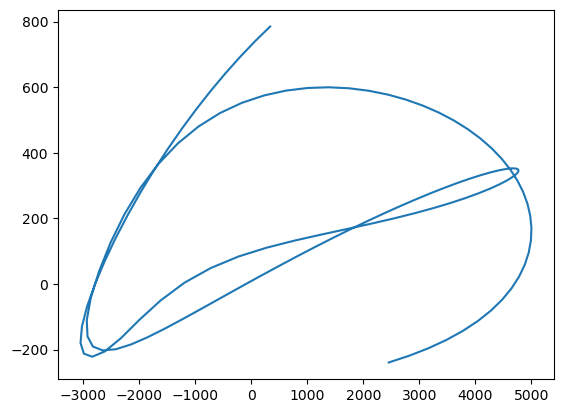

In [46]:
# Setup class
udp = udp_initial_condition(body_density, target_altitude, final_time, start_time, time_step, lower_bounds, upper_bounds, mu)

# Setup user defined problem (udp)
prob = pg.problem(udp)

# Setup optimization algorithm
algo = pg.algorithm(pg.sade(gen = number_of_generations))
pop = pg.population(prob = prob, size = population_size)

# Run optimization
algo.set_verbosity(1)
pop = algo.evolve(pop)

# Logs for output
print("Champion fitness value: ", pop.champion_f) 
print("Champion chromosome: ", pop.champion_x) 

# Retrieving champion chromosome
x = pop.champion_x

# Compute optimized trajectory
r_store, v_store, a_store = udp.compute_trajectory(x)

# Plot optimized trajectory
udp.plot_trajectory(r_store)

plt.plot(r_store[1],r_store[2])

In [36]:
import numpy as np

# Chosen good starting point
r = np.array([2.26220387e+03, -4.84587269e+03, 1.03375971e+02])
v = np.array([4.48955202e-01, 1.94488060e-01,  2.66006639e-01])

#-------------------------------------------

# After conversion to orb-elements for setting up bounds
x = np.array([10868.433406369919, 1.4916806845868078, 0.49798958467148535, 5.113590246345496, 6.267202458773954, 0.025083557832227342])

#-------------------------------------------

# Chromosome given to fitness
x1 = np.array([1.08684334e+04, 1.49168068e+00, 4.97989585e-01, 5.11359025e+00, 6.26720246e+00, 2.50835578e-02])

#-------------------------------------------

# After conversiont to cartesian inside fitness
r1 = np.array([2262.20387, -4845.87269, 103.375971])
v1 = np.array([0.4489552, 0.19448806, 0.26600664])


#-------------------------------------------

x_diff = x-x1 # Difference between boundaries and chromosome
r_diff = r-r1 # Difference chosen r and r after conversion
v_diff = v-v1 # Difference chosen v and v after conversion

#-------------------------------------------

# Printing:
print("Difference: boundary x - chroomosome x: ", x_diff)
print("Difference chosen r - converted r: ", r_diff)
print("Difference chosen v - converted v", v_diff)


Difference: boundary x - chroomosome x:  [ 6.36991899e-06  4.58680782e-09 -3.28514660e-10 -3.65450337e-09
 -1.22604593e-09  3.22273423e-11]
Difference chosen r - converted r:  [0. 0. 0.]
Difference chosen v - converted v [ 2.00000000e-09  0.00000000e+00 -1.00000003e-09]


In [71]:
import numpy as np
r = np.array([2.26220387e+03, -4.84587269e+03, 1.03375971e+02])
v = np.array([4.48955202e-01, 1.94488060e-01,  2.66006639e-01])

eq_1 = pk.ic2par(r,v,mu)
print("eq_1: ", eq_1)
r_1,v_1 = pk.par2ic(eq,mu)
r_1 = np.array(r_1)
v_1 = np.array(v_1)
print("r: ", r_1, "   v: ",v_1)
diff1_r = r-r_1
diff1_v = v-v_1
print("diff_1: ", "r: ", diff1_r, "   v: ", diff1_v)


eq_2 = pk.ic2par(r,v,1)
print("eq_2: ", eq_2)
r_2,v_2 = pk.par2ic(eq_2,1)
r_2 = np.array(r_2)
v_2 = np.array(v_2)
print("r: ", r_2, "   v: ",v_2)
diff2_r = r-r_2
diff2_v = v-v_2
print("diff_2: ", "r: ", diff2_r, "   v: ", diff2_v)

diff3_r = r_1 - r_2 
diff3_v = v_1 - v_2
print("diff_3: ", "r: ", diff3_r, "   v: ", diff3_v)












eq_1:  (10868.433406369919, 1.4916806845868078, 0.49798958467148535, 5.113590246345496, 6.267202458773954, 0.025083557832227342)
r:  [ 2262.20387  -4845.87269    103.375971]    v:  [0.4489552  0.19448806 0.26600664]
diff_1:  r:  [-2.18278728e-11 -1.09139364e-11 -1.38129508e-11]    v:  [ 8.88178420e-16 -1.99840144e-15  1.11022302e-16]
eq_2:  (3.228180703036812, 1656.9926769267652, 0.49798958467148535, 5.113590246345496, 0.00665266777649954, 0.033798920964259044)
r:  [ 2262.20387  -4845.87269    103.375971]    v:  [0.4489552  0.19448806 0.26600664]
diff_2:  r:  [-1.64618541e-10 -7.54880602e-11 -9.91775551e-11]    v:  [ 5.99520433e-15 -1.40165657e-14  1.11022302e-16]
diff_3:  r:  [-1.42790668e-10 -6.45741238e-11 -8.53646043e-11]    v:  [ 5.10702591e-15 -1.20181642e-14  0.00000000e+00]


In [80]:
# Plot optimized trajectory
udp.plot_trajectory(r_store)

BokehModel(combine_events=True, render_bundle={'docs_json': {'884629fe-62a2-4c81-b481-67345fe65b0b': {'defs': …